# Introduction 

Ce jupyter Notebook a pour but de: 

- déterminer la bande interdite,

- trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion (et d'y insérer une figure indiquant la dispersion par des flèches),

- calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique,

du matériau qui m'a été attribué, à savoir le **CsNdTe2** (mp-11742).

### (0) importation des modules nécessaires et téléchargement de la structure de bande

In [155]:
# main documentation
# https://pymatgen.org/pymatgen.electronic_structure.plotter.html
# https://pymatgen.org/_modules/pymatgen/electronic_structure/bandstructure.html


import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import * 
import numpy as np

# On télécharge la structure de bande du matériau
with MPRester("NwZmcoOXaAFq0K75qQZ") as m:

    # band structure
    structure = m.get_bandstructure_by_material_id("mp-11742")
    
    # density of state
    dos = m.get_dos_by_material_id("mp-11742")
    

### (1) détermination de la bande interdite

3.8174993735275358
Est-ce que le 'gap' est direct? False
largeur de la bande interdite:  1.2889 eV
transition: \Gamma-F


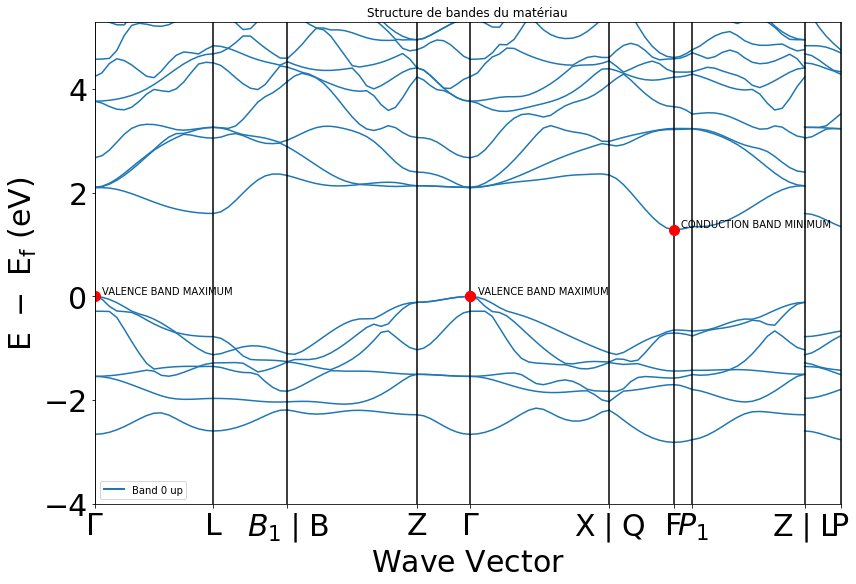

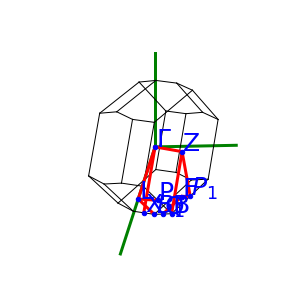

L'objet étudié est-il un métal ? False


<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

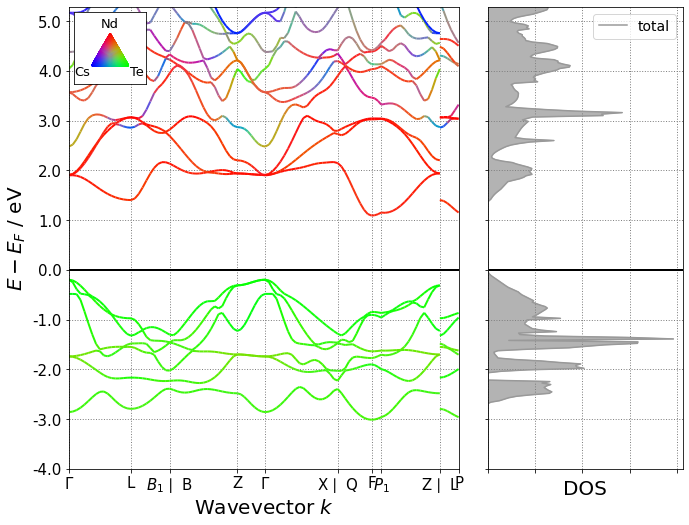

In [147]:
# ici, on affiche la structure de bandes
bandstructplot = BSPlotter(structure).get_plot()
bandstructplot.title("Structure de bandes du matériau")

# ici, on  récupère les données de la structure de bande sous forme d'un dictionnaire
data = BSPlotter(structure).bs_plot_data()

# ici, on détermine le CBM (conduction band minimum); et on le plot :-) 
CMB = data["cbm"]
k = 0
cmb = 10000
for i in CMB:
    if (i[1] < cmb): 
        cmb = i[1]
        k = i[0]
        
bandstructplot.plot(k, cmb, 'o', color='red', markersize = 10);
bandstructplot.annotate("CONDUCTION BAND MINIMUM", (k, cmb), xytext=( k + 0.05, cmb + 0.05))

print(k)
# ici, on détermine le VBM (valence band maximum); et on le plot :-) 
VMB = data["vbm"]

j = []
vmb = []
maxi = -100000
for i in VMB:
    if (i[1] >= maxi): 
        vmb.append(i[1])
        j.append(i[0])
        maxi = i[1] 
                
bandstructplot.plot(j, vmb, 'o', color='red', markersize = 10);
bandstructplot.annotate("VALENCE BAND MAXIMUM", (j[0], vmb[0]), xytext=( j[0] + 0.05, vmb[0] + 0.05))
bandstructplot.annotate("VALENCE BAND MAXIMUM", (j[1], vmb[1]), xytext=( j[1] + 0.05, vmb[1] + 0.05))

             
# ici, on détermine le type de bande interdite,  largeur de la bande interdite 
bandgap = structure.get_band_gap()

print("Est-ce que le 'gap' est direct?",bandgap['direct'])
print("largeur de la bande interdite: ",bandgap['energy'], "eV")
print("transition:",bandgap['transition'])


# ici, on affiche la première zone de brillouin ; le trajet du vecteur d'onde est très peu lisible et malheureusement pas intéractif
brillouinzoneplot = BSPlotter(structure).plot_brillouin()

# ici, on utilise une fonction qui nous indique si le matériau est un métal d'après la structure de bandes du matériau
print("L'objet étudié est-il un métal ?",structure.is_metal(efermi_tol=0.0001))

# ici, on plot la structure de bande et la DOS, density of states (comme sur materials project)
# Celle-ci quantifie le nombre d'états électroniques susceptibles d’être occupés.

plot = BSDOSPlotter(bs_projection = 'elements', dos_projection = 'total')
plot.get_plot(structure, dos = dos)

#### Présentation des résulats

Notre matériau possède bien une bande interdite d'une largeur de **1.2889 [eV]**. Il ne s'agit donc pas d'un métal, mais bien d'un **semi-conducteur**. C'est un matériau à **gap indirect**: le maximum de bande de valence et le minimum de la bande de conduction se situent à des valeurs (très) distinctes du nombre d'onde k sur le diagramme E(k).
Dans le cas des matériaux à gap indirects, les porteurs de chargent doivent intéragir à la fois avec un photon et un phonon pour modifier leur vecteur d'onde. La transition est plus difficile.

Le dernier graphique (que l'on retrouve également sur le Materials porject), montre la DOS (density of state), qui quantifie l'occupation des états électroniques.


### (2) directions de dispersions maximales et minimales

indice de la bande de conduction: defaultdict(<class 'list'>, {<Spin.up: 1>: [16]})
indice de la bande de valence: defaultdict(<class 'list'>, {<Spin.up: 1>: [14, 15]})
coefficient de dispertion maximal dans la bande de conduction: 2.472997859488717
coefficient de dispertion minimal dans la bande de conduction: 0.1094319569786598
coefficient de dispertion maximal dans la bande de valence: 1.1883391099565612
coefficient de dispertion minimal dans la bande de valence: 0.17432474679614923


Text(3.9396851239242223, -1.1685, 'direction de dispersion\nminimale')

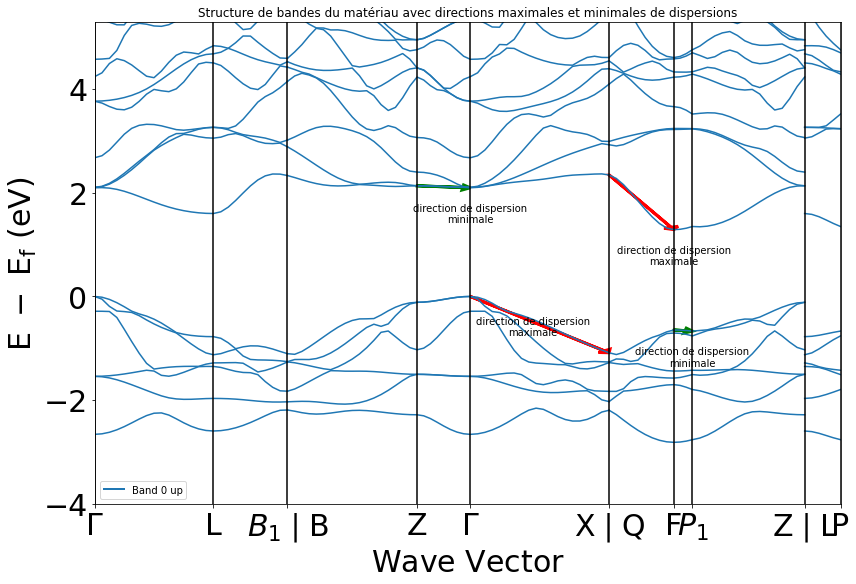

In [138]:
# ici, on récupère les données de la structure de bandes
data = BSPlotter(structure).bs_plot_data()

# ici, on détermine quel est l'indice de la bande de conduction 
index1 = structure.get_cbm().get('band_index')
print("indice de la bande de conduction:", index1)

# ici, on détermine quel est l'indice de la bande de valence (résultat évident... :-) )
index2 = structure.get_vbm().get('band_index')
print("indice de la bande de valence:", index2)

# ici, on détermine la variation d'énergie lors de chaque parcours d'un segment de la zone de brillouin
energies = data['energy']
variation_of_energies_conduction = []
variation_of_energies_valence = []

for i in range(9):  # 9 segments sont parcourus
    size = len(energies['1'][i][:][16])
    final_energy = energies['1'][i][:][16][size - 1]
    initial_energy = energies['1'][i][:][16][0]
    variation = final_energy - initial_energy
    variation_of_energies_conduction.append(variation)

for i in range(9):
    size = len(energies['1'][i][:][15])
    final_energy = energies['1'][i][:][15][size - 1]
    initial_energy = energies['1'][i][:][15][0]
    variation = final_energy - initial_energy
    variation_of_energies_valence.append(variation)
    

# ici, on détermine la distance parcourue lors de chaque parcours d'un segment de la zone de brillouin
distance = data['distances']
distance_variation = []
for i in range(9):
    size = len(distance[i])
    variation = distance[i][size-1] - distance[i][0]
    distance_variation.append(variation)
    
# ici, on détermine la dispersion pour tout les segments
valence_dispersion = []
conduction_dispersion = []
for i in range(9):
    dispersion_c = variation_of_energies_conduction[i]/distance_variation[i]
    dispersion_v = variation_of_energies_valence[i]/distance_variation[i]
    conduction_dispersion.append(dispersion_c)
    valence_dispersion.append(dispersion_v)

# ici, on détermine la dispersion maximale et minimale pour les deux bandes
max_c = 0
max_v = 0
min_c = 1000
min_v = 1000

a = 0
b = 0
c = 0 
d = 0

for i in range(9):
    if (abs(conduction_dispersion[i]) > max_c):
        max_c = abs(conduction_dispersion[i])
        a = i
        
    if (abs(conduction_dispersion[i]) < min_c):
        min_c = abs(conduction_dispersion[i])
        b = i
    if (abs(valence_dispersion[i]) > max_v):
        max_v = abs(valence_dispersion[i])
        c = i
        
    if (abs(valence_dispersion[i]) < min_v):
        min_v = abs(valence_dispersion[i])
        d = i

print("coefficient de dispertion maximal dans la bande de conduction:", max_c) 
print("coefficient de dispertion minimal dans la bande de conduction:", min_c) 

print("coefficient de dispertion maximal dans la bande de valence:", max_v) 
print("coefficient de dispertion minimal dans la bande de valence:", min_v) 

# ici, on plot la structure de bande et les flèches représentant les directions maximales de dispersion pour les deux bandes

bandstructplot = BSPlotter(structure).get_plot()
bandstructplot.title("Structure de bandes du matériau avec directions maximales et minimales de dispersions")

plt.arrow(distance[a][0],energies['1'][a][:][16][0],distance_variation[a],variation_of_energies_conduction[a], head_width = 0.10, head_length=0.05, linewidth=3, color='r', length_includes_head=True)
plt.text((distance[a][0] + distance_variation[a]), (energies['1'][a][:][16][0]+ variation_of_energies_conduction[a] - 0.5), horizontalalignment="center", verticalalignment = "center", s="direction de dispersion\nmaximale")

plt.arrow(distance[b][0],energies['1'][b][:][16][0],distance_variation[b],variation_of_energies_conduction[b], head_width = 0.10, head_length=0.05, linewidth=3, color='g', length_includes_head=True)
plt.text((distance[b][0] + distance_variation[b] ), (energies['1'][b][:][16][0]+ variation_of_energies_conduction[b] - 0.5), horizontalalignment="center", verticalalignment = "center", s="direction de dispersion\nminimale")

plt.arrow(distance[c][0],energies['1'][c][:][15][0],distance_variation[c],variation_of_energies_valence[c], head_width = 0.10, head_length=0.05, linewidth=3, color='r', length_includes_head=True)
plt.text((distance[c][0] + distance_variation[c] - 0.5), (energies['1'][c][:][15][0] + variation_of_energies_valence[c] + 0.5), horizontalalignment="center", verticalalignment = "center", s="direction de dispersion\nmaximale")

plt.arrow(distance[d][0],energies['1'][d][:][15][0],distance_variation[d],variation_of_energies_valence[d], head_width = 0.10, head_length=0.05, linewidth=3, color='g', length_includes_head=True)
plt.text((distance[d][0] + distance_variation[d] ), (energies['1'][d][:][15][0]+ variation_of_energies_valence[d] - 0.5), horizontalalignment="center", verticalalignment = "center", s="direction de dispersion\nminimale")

### (3) calcul de la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique

La masse effective est définie comme :

$m_{ij}^* = (\frac{\partial^2 E}{\partial k_i \partial k_j})^{-1}$

Il faut donc caractériser la relation de dispersion le plus precisement possible. Prenons l'exemple de la bande de conduction. On a supposé que la dispersion était parabolique. Il faut donc déterminer les coefficiants $a$, $b$ et $c$ de cette dispersion parabolique $E(k) = ak^2 + bk + c$. On possède quelques indices. Soit le CBM $(k_1,E_1)$, alors:

\begin{array}{rcr} E(k_1)  & = & E_1  \\ E'(k_1) & = & 0 \end{array}

ce qui revient à dire que: 
\begin{array}{rcr} ak_1^2 + k_1b + c & = & E_1  \\ 2ak_1 + b & = & 0 \end{array}

Enfin, on pourrait choissir un deuxième point $(k_2,E_2)$ appartenant à la structure de bande pour déterminer notre troisième inconnue. 

Ici, on choisit d'imposer à un polynome de degré 2 de passer par le CBM, mais aussi un point (très) proche à gauche et un point (très) proche à droite grâce à la fonction polyfit de numpy. Ensuite on dérive deux fois la relation de dispertion quadratique par rapport au vecteur d'onde. On obtient $(\frac{\partial^2 E}{\partial k^2}) = 2a$ et donc $m^* = \frac{1}{2a}$. L'unité de la masse effective est la masse électronique $m_{0}$. Il suffit alors de multiplier par la masse de l'électron pour obtenir une valeur en kg.  

masse effective (base de la bande de conduction): 0.05267246346754775 m_0
masse effective (base de la bande de conduction): 4.7981453871127955e-32 [Kg]
----------
masse effective (sommet de la bande de valence): -0.10949424103808295 m_0
masse effective (sommet de la bande de valence): -9.97426839312313e-32 [Kg]


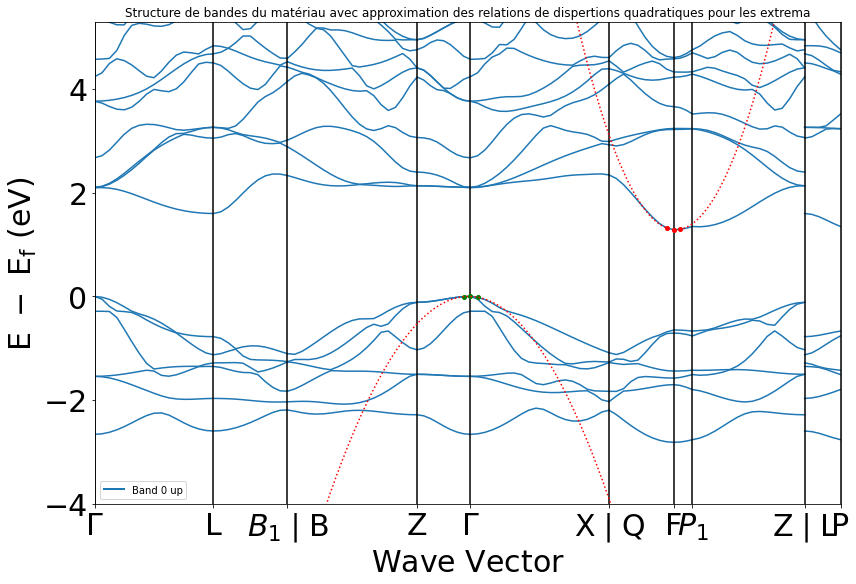

In [218]:
# ici, on affiche la structure de bandes
bandstructplot = BSPlotter(structure).get_plot()
bandstructplot.title("Structure de bandes du matériau avec approximation des relations de dispertions quadratiques pour les extrema")

# ici, on récupère les coordonnées du CBM
e1 = energies['1'][5][:][16][-1]
k1 = distance[5][-1]

# ici, on choissit deux autres points: à gauche et à droite du CBM et très proche du CBM, pour s'assurer que c'est bien un mimimum
e2 = energies['1'][5][:][16][-2]
k2 = distance[5][-2]

e3 = energies['1'][6][:][16][1]
k3 = distance[6][1]

# ici, on impose que notre parabole passe par les 3 points. On récupère les 3 coefficients de la parabole. 
dispersion_parabola = np.polyfit([k1,k2,k3], [e1,e2,e3], 2)


# ici, on évalue notre parabole sur beaucoup de points (polyval est équivalent à calculer y = a *x**2 + b*x + c)
x = np.linspace(-10, 10, 1000)
y = np.polyval(dispersion_parabola, x)

# ici, on plot le tout
bandstructplot.plot(k1, e1, 'o', color='red', markersize = 4);
bandstructplot.plot(k2, e2, 'o', color='red', markersize = 4);
bandstructplot.plot(k3, e3, 'o', color='red', markersize = 4);
plt.plot(x, y, color="red", linestyle="dotted")

# même opération avec la bande de valence

# ici, on récupère les coordonnées du VBM
ev1 = energies['1'][3][:][15][-1]
kv1 = distance[3][-1]

# ici, on choissit deux autres points: à gauche et à droite du VBM et très proche du VBM, pour s'assurer que c'est bien un maximum.
ev2 = energies['1'][3][:][15][-2]
kv2 = distance[3][-2]

ev3 = energies['1'][4][:][15][1]
kv3 = distance[4][1]

# ici, on va imposer que notre parabole passe par ces points
dispersion_parabola_2 = np.polyfit([kv1,kv2,kv3], [ev1,ev2,ev3], 2)


# ici, on évalue notre parabole sur beaucoup de points (polyval est équivalent à calculer y = a *x**2 + b*x + c)
x2 = np.linspace(-10, 10, 1000)
y2 = np.polyval(dispersion_parabola_2, x)

# ici, on plot le tout
bandstructplot.plot(kv1, ev1, 'o', color='green', markersize = 4);
bandstructplot.plot(kv2, ev2, 'o', color='green', markersize = 4);
bandstructplot.plot(kv3, ev3, 'o', color='green', markersize = 4);
plt.plot(x2, y2, color="red", linestyle="dotted")


# détermination des masses effectives
m1 = 1/(2 * dispersion_parabola[0])
m2 = 1/(2 * dispersion_parabola_2[0])

m = 9.1094 *10**(-31)

print("masse effective (base de la bande de conduction):", m1,"m_0")
print("masse effective (base de la bande de conduction):", m1 * m,"[Kg]")


print("----------")
print("masse effective (sommet de la bande de valence):", m2,"m_0")
print("masse effective (sommet de la bande de valence):", m2 * m,"[Kg]")
